## California Housing Prices Prediction using Linear Regression

##### Analyzing and predicting housing prices in California based on socioeconomic and geographical data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Objective
The objective is to predict the median house value for California districts using socioeconomic and geographical features.

In [2]:
# Load tha data

data=pd.read_csv('housing.csv')


### Dataset Description

#### Source: California Housing Dataset on Kaggle

#### Key Features: 
median_income: Median income in the block.

house_median_age: Median age of the houses.

total_rooms: Total number of rooms per household.

total_bedrooms: Total number of bedrooms per household.

households:  number of households.

population: number of population

Latitude and Longitude: Geographical coordinates.

#### Target: 
MedHouseVal (Median house value).

#### Size: 
20,6400 entries.

In [3]:
# Display the columns of the data
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
# Display the first 5 rows of the data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Display the size of the data
data.size

206400

In [6]:
# Display the shape of the data
data.shape

(20640, 10)

In [7]:
# Display the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Display the description of the data
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Exploratory Data Analysis (EDA)

#### Descriptive Statistics

   * ##### Median income shows a positive correlation with median house value (𝑅≈0.7).

In [9]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
data['ocean_proximity']=data['ocean_proximity'].map({'<1H OCEAN':0,'INLAND':1,'ISLAND':2,'NEAR BAY':3,'NEAR OCEAN':4})

In [11]:
# Display correlation of the data of median_income and median_house_value
data['median_income'].corr(data['median_house_value'])

0.6880752079585474

Correlation of the data of median_income and median_house_value is 0.6880752079585529 which is a positive correlation and it is strong correlation as it is close to 1.

* ##### House age and Total rooms have weaker correlations with house prices.

In [12]:
# Display the correlation of the House age and occupancy

data['housing_median_age'].corr(data['total_rooms'])

-0.3612622012223122

Correlation of the data of house age and total rooms is -0.361 which is very low and it is not correlated to each other.

#### Visualizations

* ##### Scatter Plot: Median income vs. house value shows a clear upward trend.

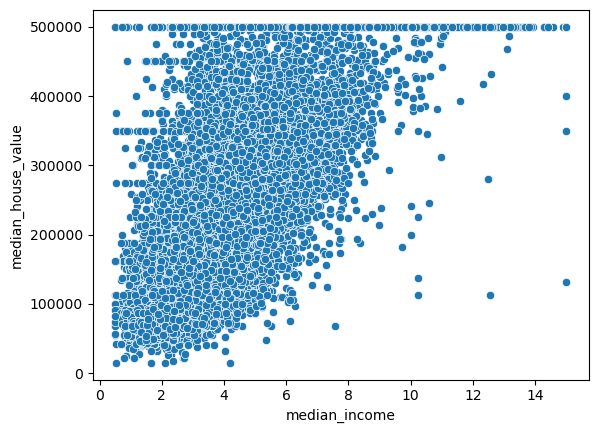

In [13]:
sns.scatterplot(x='median_income',y='median_house_value',data=data)
plt.show()



This shows that the median_income and median_house_value are positively correlated and the data is linearly distributed 

* #### Correlation Heatmap: Highlights strong and weak correlations among variables.

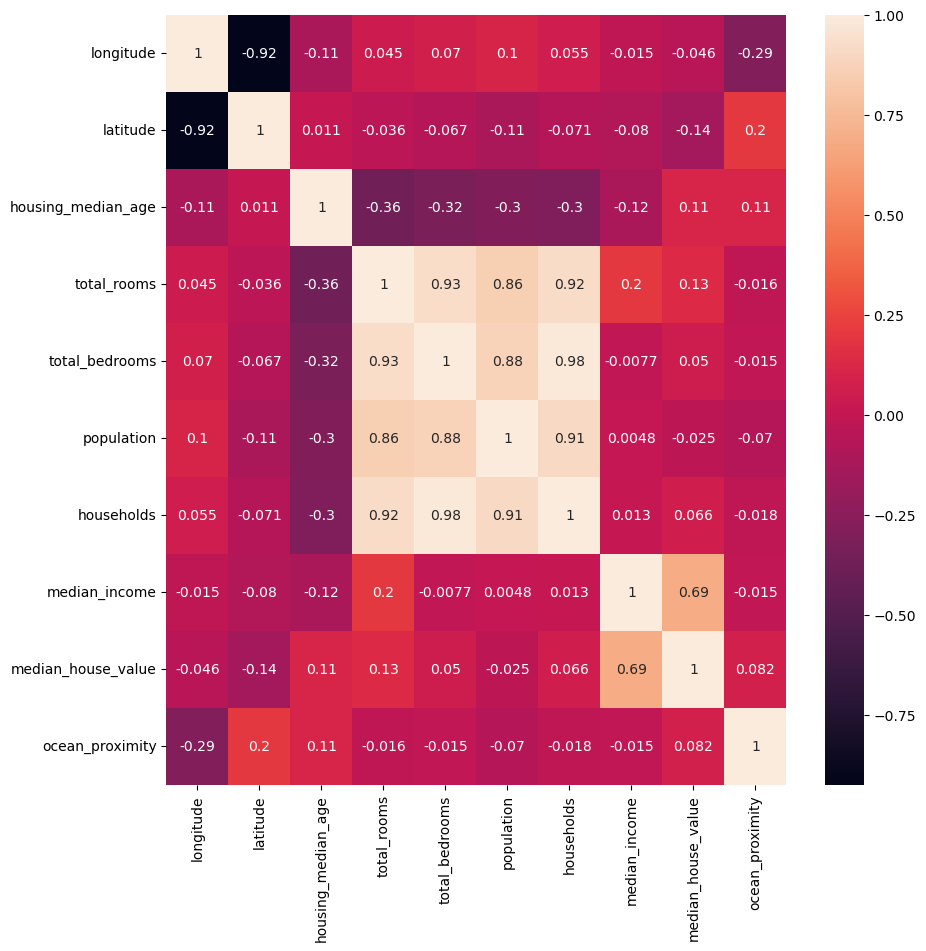

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

This shows that the median_income has the highest correlation with the median_house_value

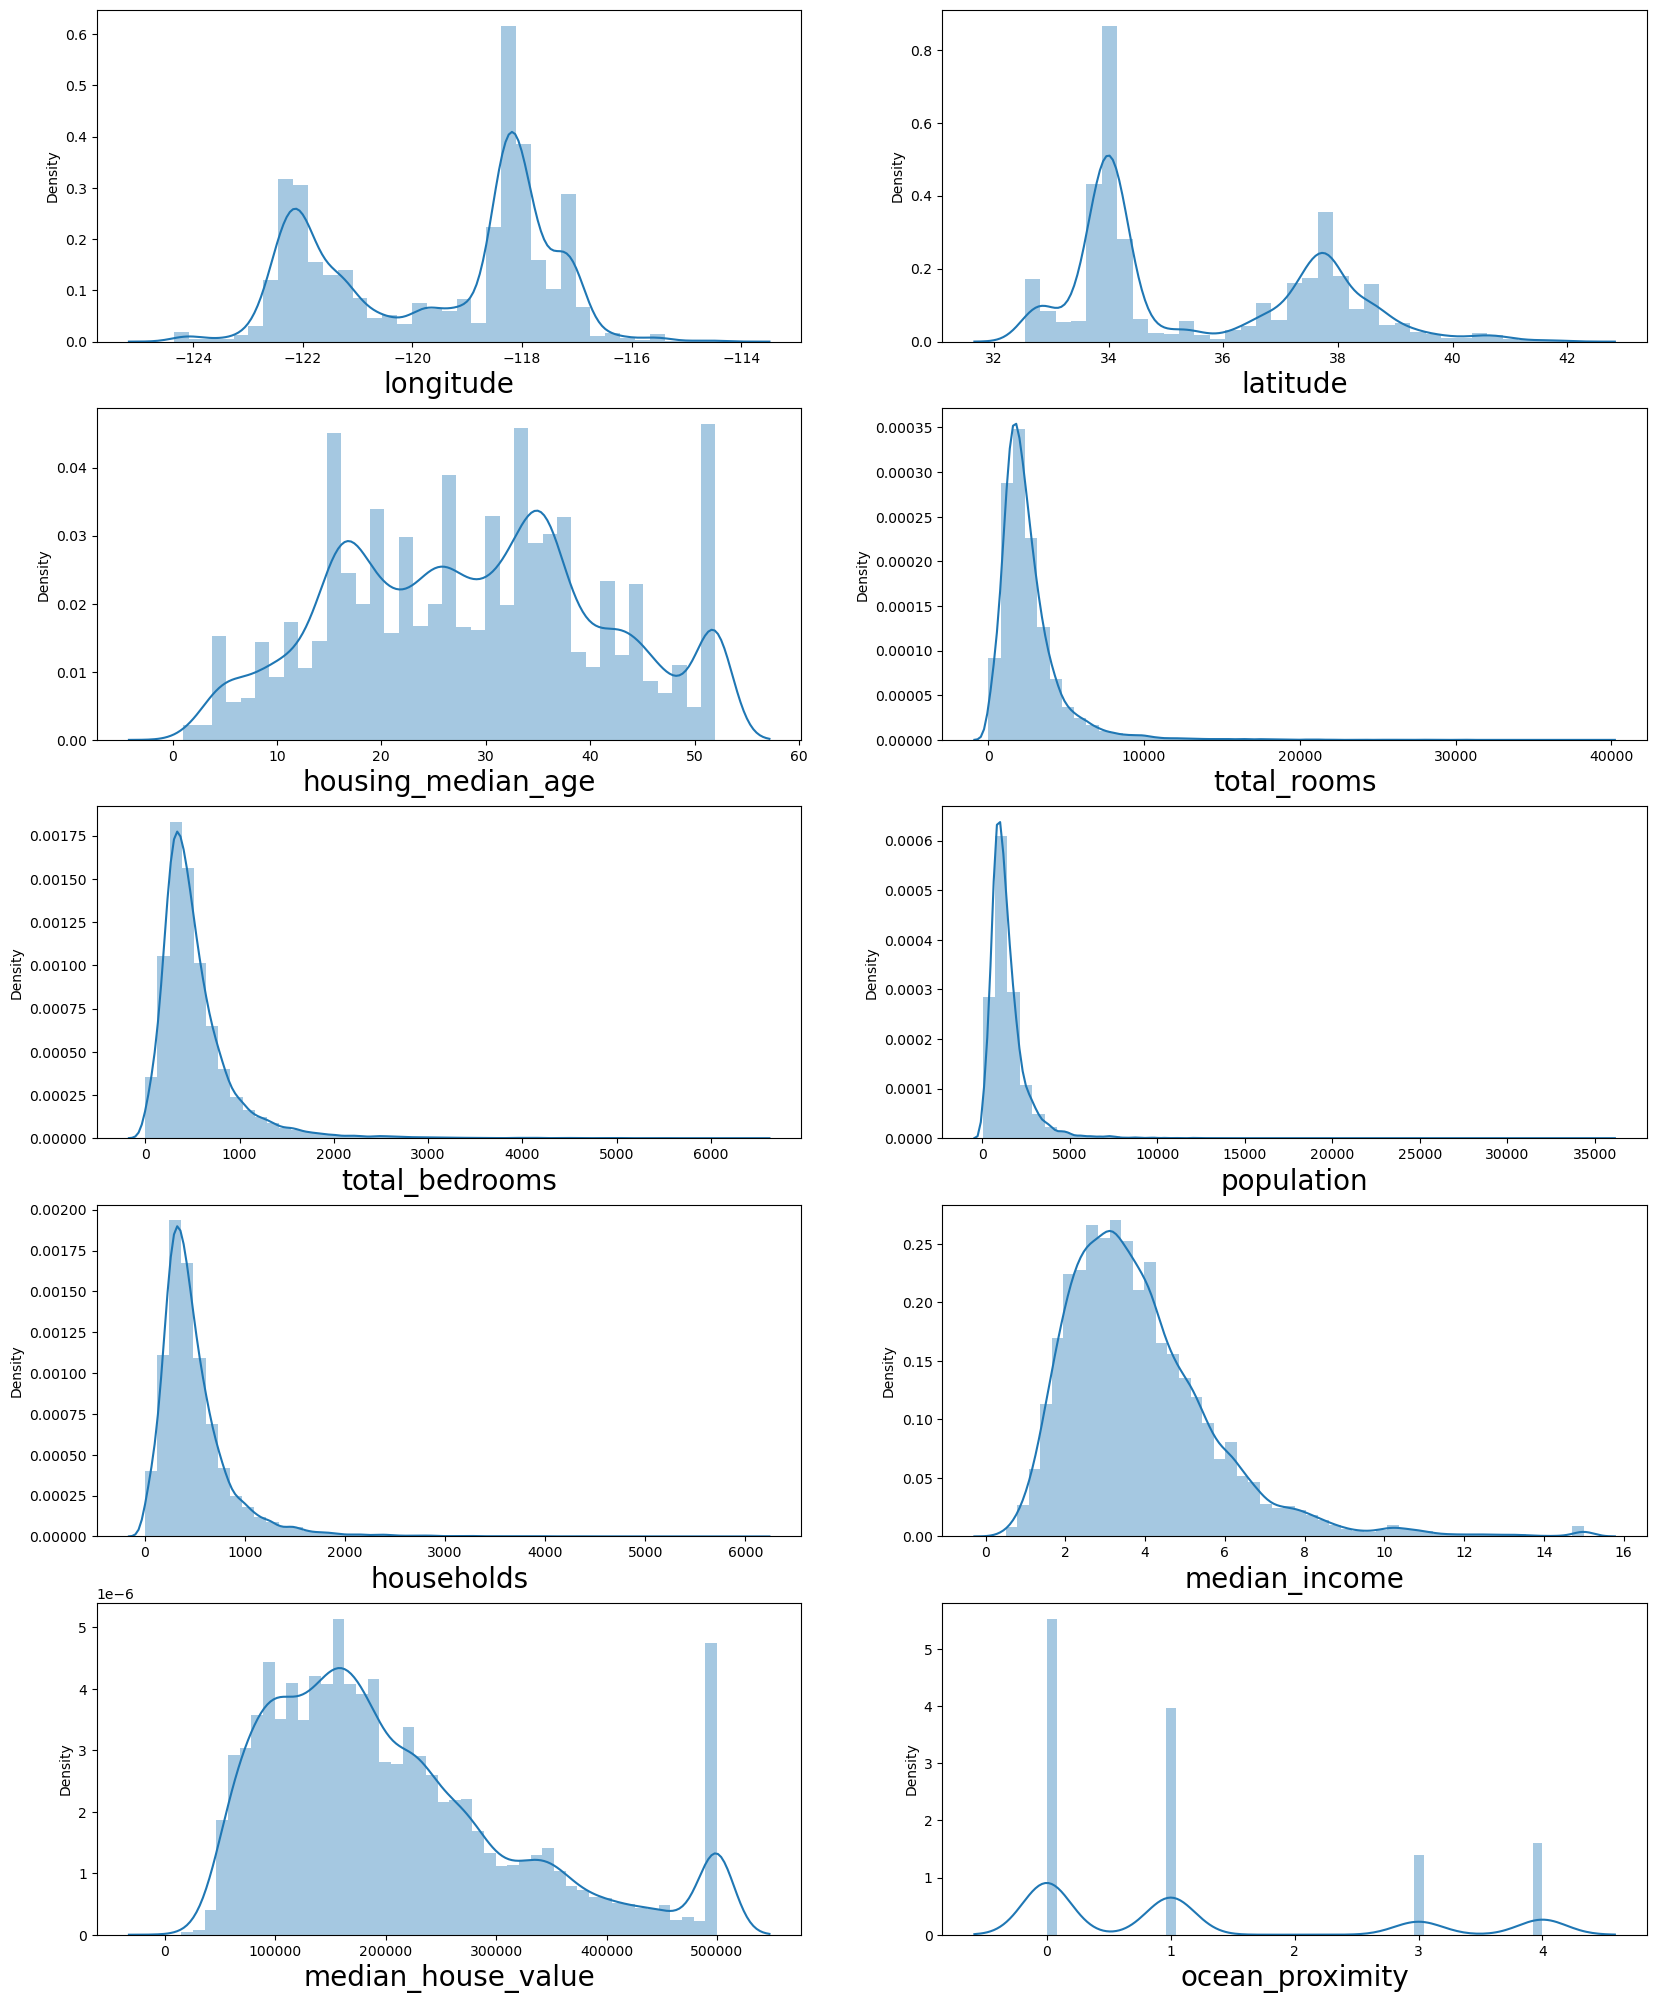

In [15]:
plt.figure(figsize=(20,25),facecolor='white') # size of the plot and background color of the plot is white 
plotnumber=1

for column in data:
    if plotnumber<=10: # as there are 9 columns in the data
        ax=plt.subplot(5,2,plotnumber) # 3 rows and 3 columns in the plot and plotnumber is the index of the plot
        sns.distplot(data[column]) # distribution plot
        plt.xlabel(column,fontsize=20) # x-axis label
    plotnumber+=1
plt.show()

This shows that the data is not normally distributed and we need to scale the data before feeding it to the model for better results 

### Data Preprocessing

In [16]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
data['total_bedrooms']=data['total_bedrooms'].fillna(data['total_bedrooms'].mean())
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


In [18]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
X=data.drop(columns='median_house_value')
y=data['median_house_value']

In [20]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [32]:
mae=mean_absolute_error(y_test,y_pred)
mae

51054.32587651542

In [34]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

69826.89013012726

In [35]:
r2_score(y_test,y_pred)

0.6260764404820008

### Model performance evaluation

The linear regression model was evaluated using standard regression metrics: 𝑅^2, RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error). Below are the results:

* 𝑅^2 Score: 0.626

This indicates that the model explains 62.6% of the variance in the median house values based on the provided features. While decent, there is room for improvement, as 37.4% of the variance remains unexplained.

* RMSE (Root Mean Squared Error): $69,826.89

On average, the model's predictions deviate from the actual values by approximately $69,827. This represents the scale of prediction errors, and for housing prices, this may indicate some scope for optimization.

* MAE (Mean Absolute Error): $51,054.33

The average absolute error in predictions is approximately $51,054, meaning the model’s predictions are off by this amount on average.

#### Conclusion

##### The model performs moderately well, with an R^2 score of 0.626 and prediction errors (RMSE and MAE) that could be acceptable depending on the application.